# Microsoft Malaware Data Challenge
As one part of their overall strategy for doing so, Microsoft is challenging the data science community to develop techniques to predict if a machine will soon be hit with malware.

https://www.kaggle.com/c/microsoft-malware-prediction

In [168]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sns

# 1 Data Setup and Exploration

### 1.1 Loading MSFT Data

In [169]:
# referred https://www.kaggle.com/theoviel/load-the-totality-of-the-data
dtypes = {
        'MachineIdentifier':                                    'category',
        'ProductName':                                          'category',
        'EngineVersion':                                        'category',
        'AppVersion':                                           'category',
        'AvSigVersion':                                         'category',
        'IsBeta':                                               'int8',
        'RtpStateBitfield':                                     'float16',
        'IsSxsPassiveMode':                                     'int8',
        'DefaultBrowsersIdentifier':                            'float32',
        'AVProductStatesIdentifier':                            'float32',
        'AVProductsInstalled':                                  'float16',
        'AVProductsEnabled':                                    'float16',
        'HasTpm':                                               'int8',
        'CountryIdentifier':                                    'int16',
        'CityIdentifier':                                       'float32',
        'OrganizationIdentifier':                               'float16',
        'GeoNameIdentifier':                                    'float16',
        'LocaleEnglishNameIdentifier':                          'int16',
        'Platform':                                             'category',
        'Processor':                                            'category',
        'OsVer':                                                'category',
        'OsBuild':                                              'int16',
        'OsSuite':                                              'int16',
        'OsPlatformSubRelease':                                 'category',
        'OsBuildLab':                                           'category',
        'SkuEdition':                                           'category',
        'IsProtected':                                          'float16',
        'AutoSampleOptIn':                                      'int8',
        'PuaMode':                                              'category',
        'SMode':                                                'float16',
        'IeVerIdentifier':                                      'float16',
        'SmartScreen':                                          'category',
        'Firewall':                                             'float16',
        'UacLuaenable':                                         'float32',
        'UacLuaenable':                                         'float64', # was 'float32'
        'Census_MDC2FormFactor':                                'category',
        'Census_DeviceFamily':                                  'category',
        'Census_OEMNameIdentifier':                             'float32', # was 'float16'
        'Census_OEMModelIdentifier':                            'float32',
        'Census_ProcessorCoreCount':                            'float16',
        'Census_ProcessorManufacturerIdentifier':               'float16',
        'Census_ProcessorModelIdentifier':                      'float32', # was 'float16'
        'Census_ProcessorClass':                                'category',
        'Census_PrimaryDiskTotalCapacity':                      'float64', # was 'float32'
        'Census_PrimaryDiskTypeName':                           'category',
        'Census_SystemVolumeTotalCapacity':                     'float64', # was 'float32'
        'Census_HasOpticalDiskDrive':                           'int8',
        'Census_TotalPhysicalRAM':                              'float32',
        'Census_ChassisTypeName':                               'category',
        'Census_InternalPrimaryDiagonalDisplaySizeInInches':    'float32', # was 'float16'
        'Census_InternalPrimaryDisplayResolutionHorizontal':    'float32', # was 'float16'
        'Census_InternalPrimaryDisplayResolutionVertical':      'float32', # was 'float16'
        'Census_PowerPlatformRoleName':                         'category',
        'Census_InternalBatteryType':                           'category',
        'Census_InternalBatteryNumberOfCharges':                'float64', # was 'float32'
        'Census_OSVersion':                                     'category',
        'Census_OSArchitecture':                                'category',
        'Census_OSBranch':                                      'category',
        'Census_OSBuildNumber':                                 'int16',
        'Census_OSBuildRevision':                               'int32',
        'Census_OSEdition':                                     'category',
        'Census_OSSkuName':                                     'category',
        'Census_OSInstallTypeName':                             'category',
        'Census_OSInstallLanguageIdentifier':                   'float16',
        'Census_OSUILocaleIdentifier':                          'int16',
        'Census_OSWUAutoUpdateOptionsName':                     'category',
        'Census_IsPortableOperatingSystem':                     'int8',
        'Census_GenuineStateName':                              'category',
        'Census_ActivationChannel':                             'category',
        'Census_IsFlightingInternal':                           'float16',
        'Census_IsFlightsDisabled':                             'float16',
        'Census_FlightRing':                                    'category',
        'Census_ThresholdOptIn':                                'float16',
        'Census_FirmwareManufacturerIdentifier':                'float16',
        'Census_FirmwareVersionIdentifier':                     'float32',
        'Census_IsSecureBootEnabled':                           'int8',
        'Census_IsWIMBootEnabled':                              'float16',
        'Census_IsVirtualDevice':                               'float16',
        'Census_IsTouchEnabled':                                'int8',
        'Census_IsPenCapable':                                  'int8',
        'Census_IsAlwaysOnAlwaysConnectedCapable':              'float16',
        'Wdft_IsGamer':                                         'float16',
        'Wdft_RegionIdentifier':                                'float16',
        'HasDetections':                                        'int8'
}

In [279]:
train = pd.read_csv('MSFT_DATA/train_sample_50k.csv', dtype=dtypes)

### 1.2 Data Exploration

In [280]:
print("%d Columns" % (len(train.columns)))
print("%d Rows" % (len(train)))
train.head()

83 Columns
50000 Rows


,MachineIdentifier,ProductName,EngineVersion,AppVersion,AvSigVersion,IsBeta,RtpStateBitfield,IsSxsPassiveMode,DefaultBrowsersIdentifier,AVProductStatesIdentifier,...,Census_FirmwareVersionIdentifier,Census_IsSecureBootEnabled,Census_IsWIMBootEnabled,Census_IsVirtualDevice,Census_IsTouchEnabled,Census_IsPenCapable,Census_IsAlwaysOnAlwaysConnectedCapable,Wdft_IsGamer,Wdft_RegionIdentifier,HasDetections
0,0000028988387b115f69f31a3bf04f09,win8defender,1.1.15100.1,4.18.1807.18075,1.273.1735.0,0,7.0000,0,nan,"53,447.0000",...,"36,144.0000",0,nan,0.0000,0,0,0.0000,0.0000,10.0000,0
1,000007535c3f730efa9ea0b7ef1bd645,win8defender,1.1.14600.4,4.13.17134.1,1.263.48.0,0,7.0000,0,nan,"53,447.0000",...,"57,858.0000",0,nan,0.0000,0,0,0.0000,0.0000,8.0000,0
2,000007905a28d863f6d0d597892cd692,win8defender,1.1.15100.1,4.18.1807.18075,1.273.1341.0,0,7.0000,0,nan,"53,447.0000",...,"52,682.0000",0,nan,0.0000,0,0,0.0000,0.0000,3.0000,0
3,00000b11598a75ea8ba1beea8459149f,win8defender,1.1.15100.1,4.18.1807.18075,1.273.1527.0,0,7.0000,0,nan,"53,447.0000",...,"20,050.0000",0,nan,0.0000,0,0,0.0000,0.0000,3.0000,1
4,000014a5f00daa18e76b81417eeb99fc,win8defender,1.1.15100.1,4.18.1807.18075,1.273.1379.0,0,7.0000,0,nan,"53,447.0000",...,"19,844.0000",0,0.0000,0.0000,0,0,0.0000,0.0000,1.0000,1


In [281]:
sum([True in i for i in train.isnull().values])

50000

In [282]:
sum(['nan' in i for i in train.values])

0

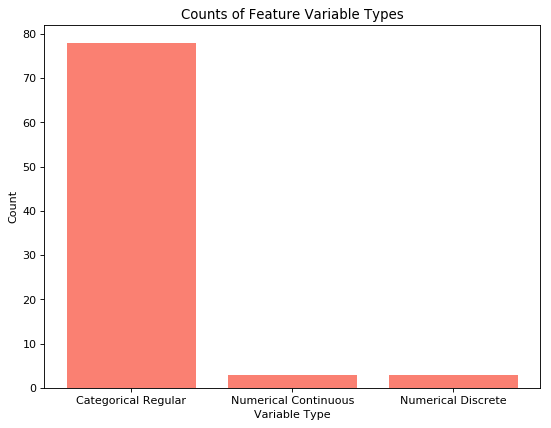

In [283]:
figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')

plt.bar(["Categorical Regular", "Numerical Continuous", "Numerical Discrete"], [78, 3, 3], color='salmon')

plt.title('Counts of Feature Variable Types')
plt.xlabel('Variable Type')
plt.ylabel('Count')

plt.savefig('Var-Type-Bar.png')

plt.show()

## 2 Feature Engineering

### 2.1 Missing Entries

In [284]:
bad_features = []

In [285]:
# List of percentage of null values...
(train.isnull().sum()/train.shape[0]).sort_values(ascending=False)

PuaMode                                             0.9997
Census_ProcessorClass                               0.9958
DefaultBrowsersIdentifier                           0.9513
Census_IsFlightingInternal                          0.8315
Census_InternalBatteryType                          0.7126
Census_ThresholdOptIn                               0.6372
Census_IsWIMBootEnabled                             0.6363
SmartScreen                                         0.3576
OrganizationIdentifier                              0.3056
SMode                                               0.0595
CityIdentifier                                      0.0365
Wdft_IsGamer                                        0.0339
Wdft_RegionIdentifier                               0.0339
Census_InternalBatteryNumberOfCharges               0.0308
Census_FirmwareManufacturerIdentifier               0.0213
Census_FirmwareVersionIdentifier                    0.0188
Census_IsFlightsDisabled                            0.01

In [286]:
missing_vals = (train.isnull().sum()/train.shape[0]).sort_values(ascending=True)

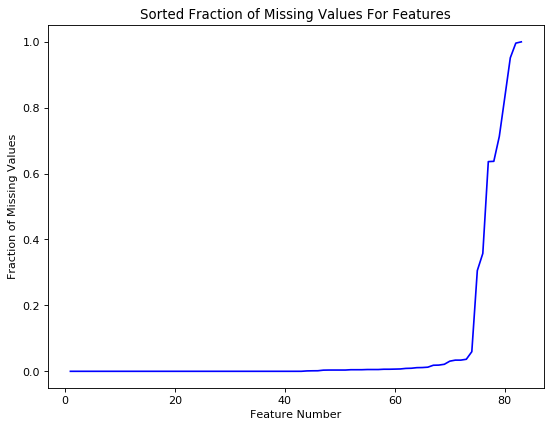

In [287]:
figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')

plt.plot(list(range(1, len(missing_vals) + 1, 1)), missing_vals, color='blue',)

# Plot text
plt.title('Sorted Fraction of Missing Values For Features')
plt.xlabel('Feature Number')
plt.ylabel('Fraction of Missing Values')

plt.savefig('Missing_Features.png', dpi=420)
plt.show()

In [288]:
bad_features.append('PuaMode')
bad_features.append('Census_ProcessorClass')

### 2.2 Skewed Features
For categorical data, extremely skewed data means most of the datapoints belong to a particular category for that feature.

i.e. House color but all the houses in the data are red. (Just remove house color)

In [289]:
pd.options.display.float_format = '{:,.4f}'.format

sk_df = pd.DataFrame([{'column': c, 'uniq': train[c].nunique(), 
                       'skewness': train[c].value_counts(normalize=True)
                       .values[0]} for c in train.columns])

# Skewness
sk_df = sk_df.sort_values('skewness', ascending=False)
sk_df.head()

,column,skewness,uniq
27,AutoSampleOptIn,1.0000,1
28,PuaMode,1.0000,1
69,Census_IsFlightsDisabled,1.0000,1
5,IsBeta,1.0000,1
75,Census_IsWIMBootEnabled,1.0000,1


In [290]:
sk_df

,column,skewness,uniq
27,AutoSampleOptIn,1.0000,1
28,PuaMode,1.0000,1
69,Census_IsFlightsDisabled,1.0000,1
5,IsBeta,1.0000,1
75,Census_IsWIMBootEnabled,1.0000,1
68,Census_IsFlightingInternal,1.0000,1
71,Census_ThresholdOptIn,0.9998,2
29,SMode,0.9996,2
65,Census_IsPortableOperatingSystem,0.9992,2
35,Census_DeviceFamily,0.9987,2


In [291]:
skew_thresh = .99

bad_features.extend(sk_df[sk_df.skewness > skew_thresh].column.tolist())
bad_features = list(set(bad_features))
bad_features

['Census_IsVirtualDevice',
 'Census_ProcessorClass',
 'AutoSampleOptIn',
 'Census_IsFlightingInternal',
 'UacLuaenable',
 'Census_IsPortableOperatingSystem',
 'Census_IsFlightsDisabled',
 'Census_IsWIMBootEnabled',
 'Census_ThresholdOptIn',
 'SMode',
 'Census_DeviceFamily',
 'PuaMode',
 'IsBeta']

In [292]:
# Updating our train data
train.drop(bad_features, axis=1, inplace=True)

In [293]:
# Machine ID shouldn't help and only adds noise since theres too many
train.drop('MachineIdentifier', axis=1, inplace=True)

### 2.3 Purifiy Missing Data

In [294]:
sum([True in i for i in train.isnull().values])

49540

In [295]:
# Fill in the numerical data
train = train.fillna(train.median())

In [296]:
train.head()

,ProductName,EngineVersion,AppVersion,AvSigVersion,RtpStateBitfield,IsSxsPassiveMode,DefaultBrowsersIdentifier,AVProductStatesIdentifier,AVProductsInstalled,AVProductsEnabled,...,Census_FlightRing,Census_FirmwareManufacturerIdentifier,Census_FirmwareVersionIdentifier,Census_IsSecureBootEnabled,Census_IsTouchEnabled,Census_IsPenCapable,Census_IsAlwaysOnAlwaysConnectedCapable,Wdft_IsGamer,Wdft_RegionIdentifier,HasDetections
0,win8defender,1.1.15100.1,4.18.1807.18075,1.273.1735.0,7.0000,0,"1,632.0000","53,447.0000",1.0000,1.0000,...,Retail,628.0000,"36,144.0000",0,0,0,0.0000,0.0000,10.0000,0
1,win8defender,1.1.14600.4,4.13.17134.1,1.263.48.0,7.0000,0,"1,632.0000","53,447.0000",1.0000,1.0000,...,NOT_SET,628.0000,"57,858.0000",0,0,0,0.0000,0.0000,8.0000,0
2,win8defender,1.1.15100.1,4.18.1807.18075,1.273.1341.0,7.0000,0,"1,632.0000","53,447.0000",1.0000,1.0000,...,Retail,142.0000,"52,682.0000",0,0,0,0.0000,0.0000,3.0000,0
3,win8defender,1.1.15100.1,4.18.1807.18075,1.273.1527.0,7.0000,0,"1,632.0000","53,447.0000",1.0000,1.0000,...,Retail,355.0000,"20,050.0000",0,0,0,0.0000,0.0000,3.0000,1
4,win8defender,1.1.15100.1,4.18.1807.18075,1.273.1379.0,7.0000,0,"1,632.0000","53,447.0000",1.0000,1.0000,...,Retail,355.0000,"19,844.0000",0,0,0,0.0000,0.0000,1.0000,1


In [297]:
# Fill in the categorical data
train = train.fillna(train.mode().iloc[0])

In [298]:
train.head()

,ProductName,EngineVersion,AppVersion,AvSigVersion,RtpStateBitfield,IsSxsPassiveMode,DefaultBrowsersIdentifier,AVProductStatesIdentifier,AVProductsInstalled,AVProductsEnabled,...,Census_FlightRing,Census_FirmwareManufacturerIdentifier,Census_FirmwareVersionIdentifier,Census_IsSecureBootEnabled,Census_IsTouchEnabled,Census_IsPenCapable,Census_IsAlwaysOnAlwaysConnectedCapable,Wdft_IsGamer,Wdft_RegionIdentifier,HasDetections
0,win8defender,1.1.15100.1,4.18.1807.18075,1.273.1735.0,7.0000,0,"1,632.0000","53,447.0000",1.0000,1.0000,...,Retail,628.0000,"36,144.0000",0,0,0,0.0000,0.0000,10.0000,0
1,win8defender,1.1.14600.4,4.13.17134.1,1.263.48.0,7.0000,0,"1,632.0000","53,447.0000",1.0000,1.0000,...,NOT_SET,628.0000,"57,858.0000",0,0,0,0.0000,0.0000,8.0000,0
2,win8defender,1.1.15100.1,4.18.1807.18075,1.273.1341.0,7.0000,0,"1,632.0000","53,447.0000",1.0000,1.0000,...,Retail,142.0000,"52,682.0000",0,0,0,0.0000,0.0000,3.0000,0
3,win8defender,1.1.15100.1,4.18.1807.18075,1.273.1527.0,7.0000,0,"1,632.0000","53,447.0000",1.0000,1.0000,...,Retail,355.0000,"20,050.0000",0,0,0,0.0000,0.0000,3.0000,1
4,win8defender,1.1.15100.1,4.18.1807.18075,1.273.1379.0,7.0000,0,"1,632.0000","53,447.0000",1.0000,1.0000,...,Retail,355.0000,"19,844.0000",0,0,0,0.0000,0.0000,1.0000,1


### 2.4 Correlated Features

In [299]:
from sklearn.preprocessing import LabelEncoder

train['SmartScreen'] = train.SmartScreen.astype('category')
train['Census_InternalBatteryType'] = train.Census_InternalBatteryType.astype('category')

cate_cols = train.select_dtypes(include='category').columns.tolist()

le = LabelEncoder()

for col in cate_cols:
    train[col] = le.fit_transform(train[col])

from sklearn.preprocessing import LabelEncoder
category_cols = [(train[c].dtype == 'O' or train[c].dtype == 'int64') for c in train.columns]
le = LabelEncoder()

train['IsBeta'] = le.fit_transform(train['IsBeta'].astype('category'))


for col in train.columns[category_cols]:
    try:
        train[col] = le.fit_transform(train[col].astype('category'))
    except:
        print(col)

In [300]:
train[train.columns[0:10]].corr()

,ProductName,EngineVersion,AppVersion,AvSigVersion,RtpStateBitfield,IsSxsPassiveMode,DefaultBrowsersIdentifier,AVProductStatesIdentifier,AVProductsInstalled,AVProductsEnabled
ProductName,1.0000,-0.0128,0.1423,-0.0120,-0.0045,0.0143,-0.0014,0.1531,0.0317,-0.0386
EngineVersion,-0.0128,1.0000,0.2581,0.8894,0.0045,0.0005,-0.0680,0.0658,-0.1161,-0.0273
AppVersion,0.1423,0.2581,1.0000,0.2398,0.0319,-0.0208,-0.0535,0.1108,-0.1012,-0.0596
AvSigVersion,-0.0120,0.8894,0.2398,1.0000,0.0013,0.0074,-0.0310,0.0503,-0.1055,-0.0236
RtpStateBitfield,-0.0045,0.0045,0.0319,0.0013,1.0000,-0.8897,0.0018,0.1175,-0.1887,-0.0041
IsSxsPassiveMode,0.0143,0.0005,-0.0208,0.0074,-0.8897,1.0000,-0.0039,-0.1196,0.1990,0.0390
DefaultBrowsersIdentifier,-0.0014,-0.0680,-0.0535,-0.0310,0.0018,-0.0039,1.0000,0.0021,-0.0002,0.0017
AVProductStatesIdentifier,0.1531,0.0658,0.1108,0.0503,0.1175,-0.1196,0.0021,1.0000,-0.6325,-0.1215
AVProductsInstalled,0.0317,-0.1161,-0.1012,-0.1055,-0.1887,0.1990,-0.0002,-0.6325,1.0000,0.2726
AVProductsEnabled,-0.0386,-0.0273,-0.0596,-0.0236,-0.0041,0.0390,0.0017,-0.1215,0.2726,1.0000


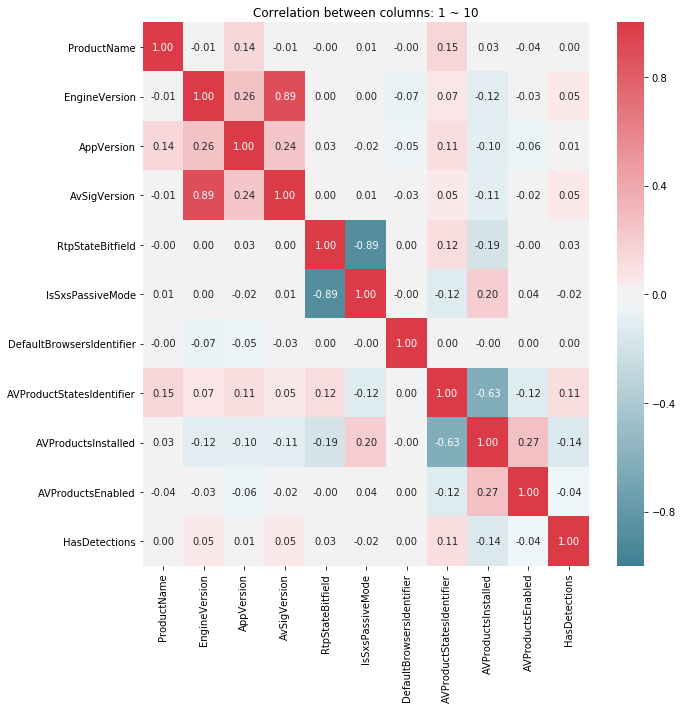

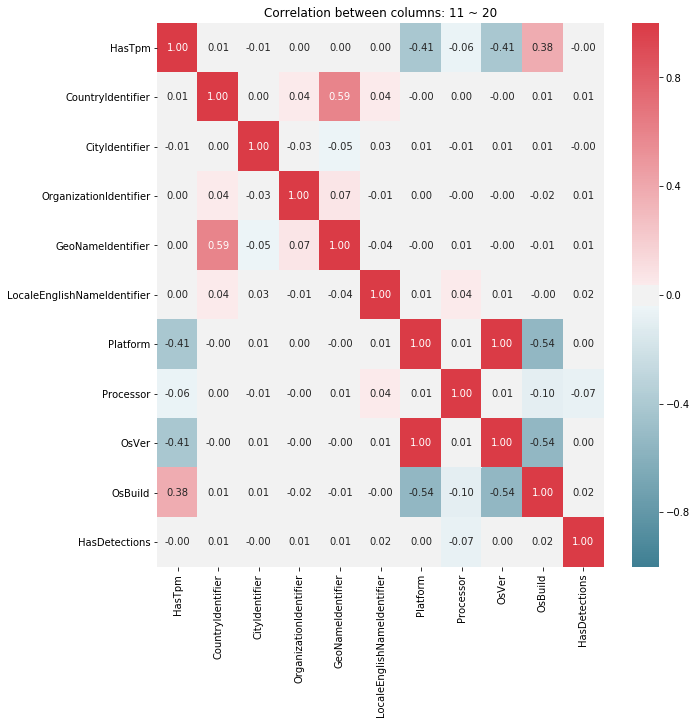

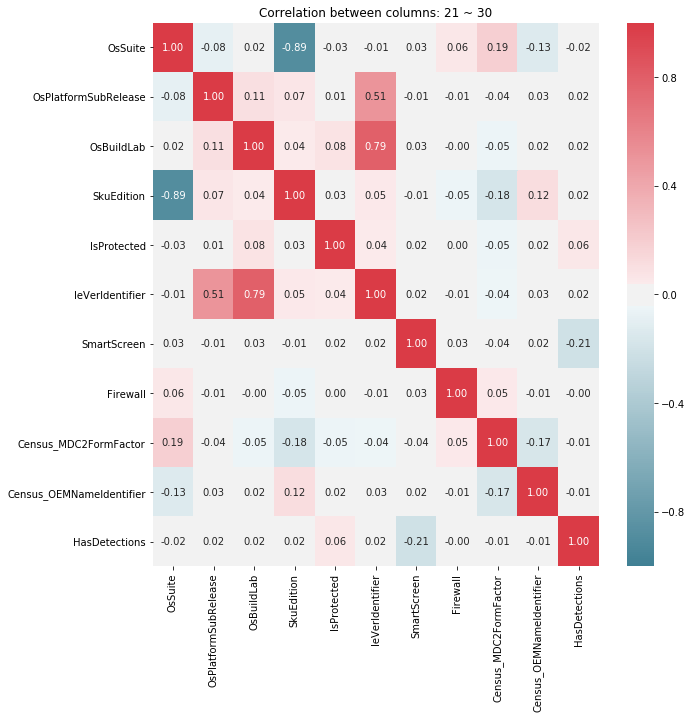

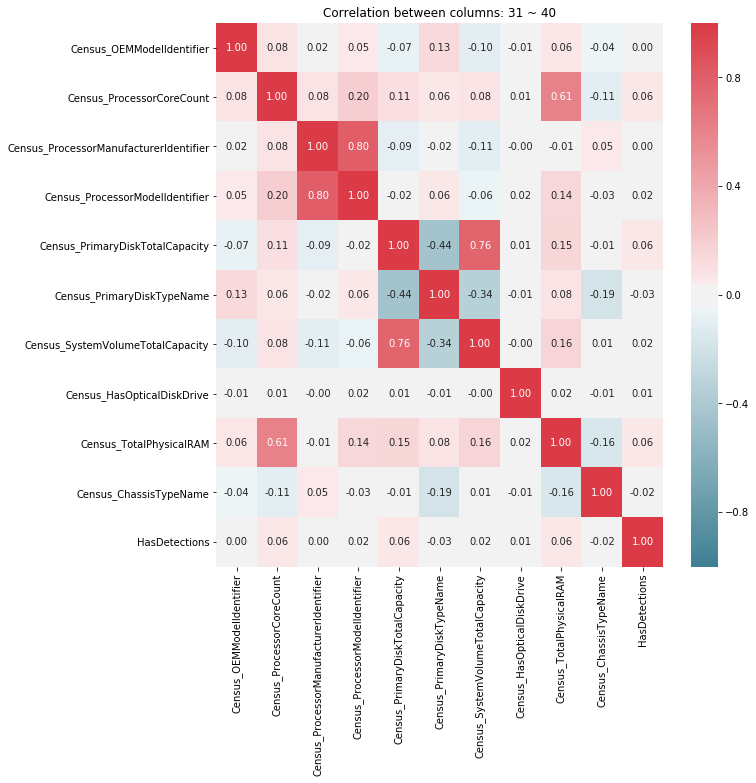

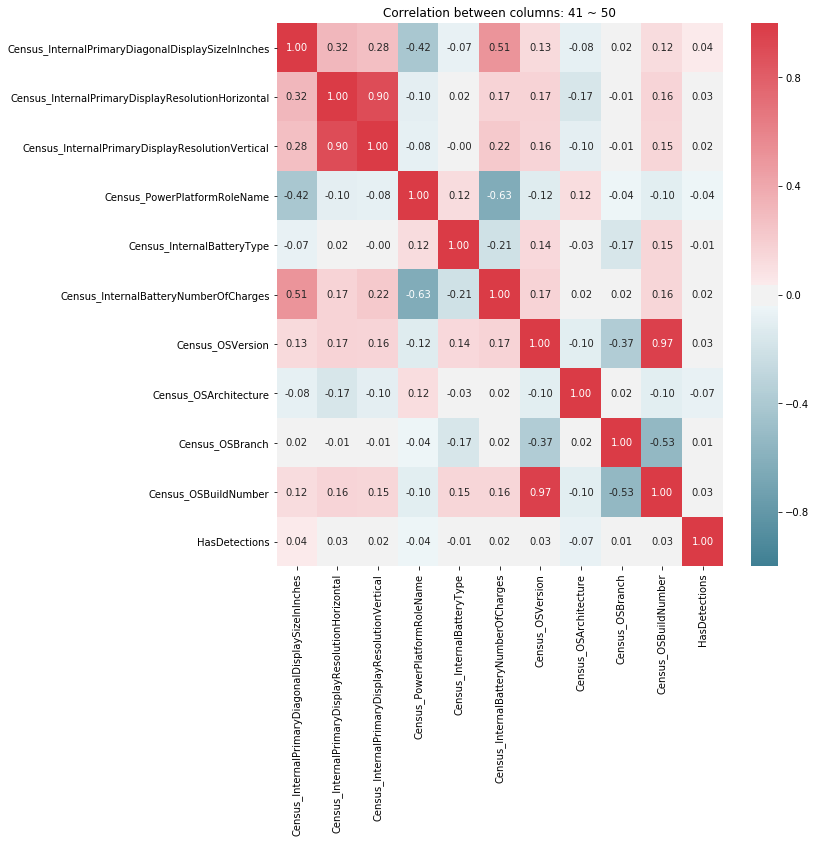

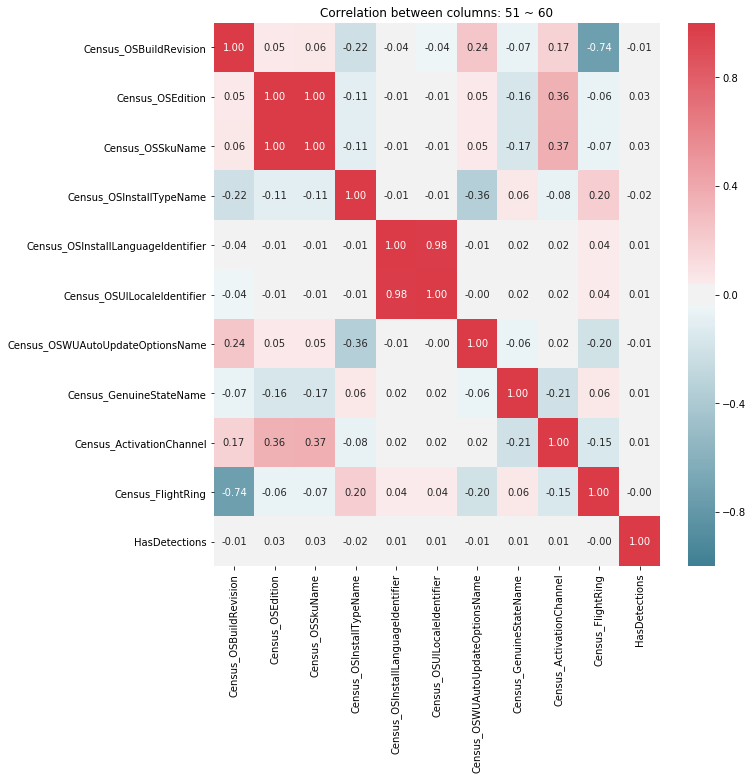

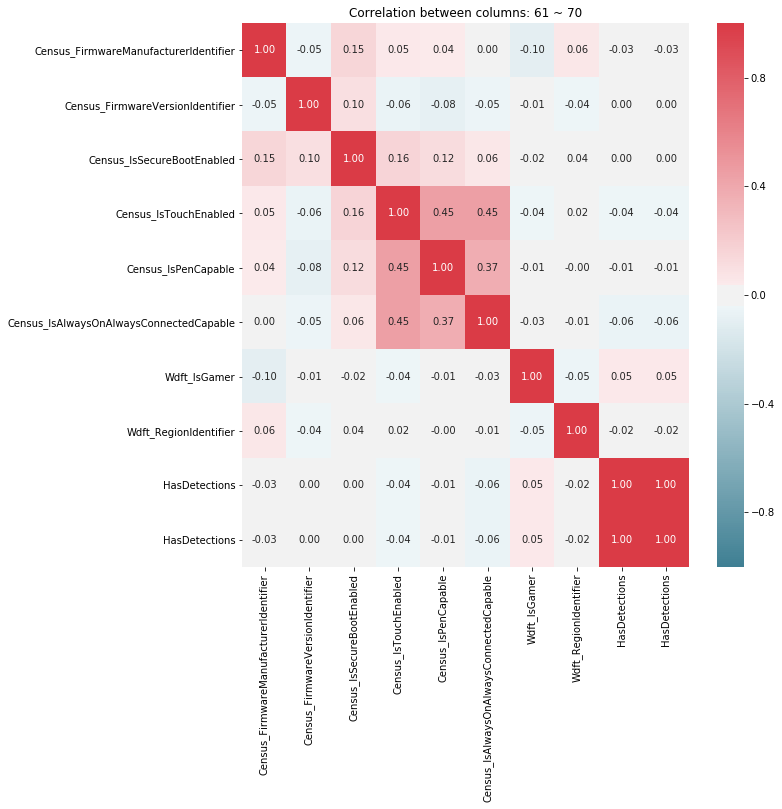

In [301]:
# Display correlation heat maps

cols = train.columns
for i in range(0, len(cols), 10):
    co_cols = cols[i:i+10].tolist() + ['HasDetections']
    #co_cols.append(pd.Index()'HasDetections')
    plt.figure(figsize=(10,10))
    colormap = sns.diverging_palette(220, 10, as_cmap=True)
    #Generate Heat Map, allow annotations and place floats in map
    sns.heatmap(train[co_cols].corr(), cmap=colormap, annot=True, fmt=".2f", vmin = -1, vmax=1)

    plt.title('Correlation between columns: %d ~ %d' % (i+1, i+10))
    title = 'corr_' + str(i+1)
    plt.savefig(title, dpi=420, )
    plt.show()

##### Display correlation heat maps (Correlation all together)

cols = train.columns
#for i in range(0, len(cols), 10):
co_cols = cols
#co_cols.append(pd.Index()'HasDetections')
plt.figure(figsize=(10,10))
sns.heatmap(train[co_cols].corr(), cmap='RdBu_r', annot=True, center=0.0)
plt.title('Correlation between columns: %d ~ %d' % (i, i+10))
plt.show()

In [302]:
# Remove highly correlated data

corr_thresh = .99
cols = train.columns
corr = train.corr()
new_bad = []

for i in range(0, corr.shape[1]):
    for j in range(0, i):
        # Remove highly correlated features
        if (abs(corr.iloc[i, j]) >= corr_thresh):
            # Remove the feature with less information
            if(train[cols[i]].nunique() > train[cols[j]].nunique()):
                new_bad.append(cols[j])
            else:
                new_bad.append(cols[i])

In [303]:
if ('HasDetections' in new_bad):
    new_bad.remove('HasDetections')

len(new_bad)

2

In [304]:
train.drop(new_bad, axis=1, inplace=True)

In [305]:
bad_features.extend(new_bad)
bad_features = list(set(bad_features))

### 2.4 (alternative) Modified Tree Algorithm

## 3 Prediction
Testing trees and logistic regression with different regularizers. Then hypertuning each to select the best model.

In [306]:
bad_features

['Census_ProcessorClass',
 'AutoSampleOptIn',
 'Census_IsFlightingInternal',
 'PuaMode',
 'UacLuaenable',
 'Census_IsPortableOperatingSystem',
 'Platform',
 'Census_IsFlightsDisabled',
 'Census_IsWIMBootEnabled',
 'Census_ThresholdOptIn',
 'SMode',
 'Census_DeviceFamily',
 'Census_OSSkuName',
 'Census_IsVirtualDevice',
 'IsBeta']

In [307]:
train.columns

Index(['ProductName', 'EngineVersion', 'AppVersion', 'AvSigVersion',
       'RtpStateBitfield', 'IsSxsPassiveMode', 'DefaultBrowsersIdentifier',
       'AVProductStatesIdentifier', 'AVProductsInstalled', 'AVProductsEnabled',
       'HasTpm', 'CountryIdentifier', 'CityIdentifier',
       'OrganizationIdentifier', 'GeoNameIdentifier',
       'LocaleEnglishNameIdentifier', 'Processor', 'OsVer', 'OsBuild',
       'OsSuite', 'OsPlatformSubRelease', 'OsBuildLab', 'SkuEdition',
       'IsProtected', 'IeVerIdentifier', 'SmartScreen', 'Firewall',
       'Census_MDC2FormFactor', 'Census_OEMNameIdentifier',
       'Census_OEMModelIdentifier', 'Census_ProcessorCoreCount',
       'Census_ProcessorManufacturerIdentifier',
       'Census_ProcessorModelIdentifier', 'Census_PrimaryDiskTotalCapacity',
       'Census_PrimaryDiskTypeName', 'Census_SystemVolumeTotalCapacity',
       'Census_HasOpticalDiskDrive', 'Census_TotalPhysicalRAM',
       'Census_ChassisTypeName',
       'Census_InternalPrimaryDiago

In [308]:
len(train.columns)

67

In [309]:
# Setting up variables
UB = 8000
UB1 = 9000


X = train.drop('HasDetections', axis=1).values[:UB]
y = train['HasDetections'].tolist()[:UB]

X_val = train.drop('HasDetections', axis=1).values[UB:UB1]
y_val = train['HasDetections'].tolist()[UB:UB1]

X_test = train.drop('HasDetections', axis=1).values[UB1:]
y_test = train['HasDetections'].tolist()[UB1:]

### 3.1 Decision Tree Classifier

In [310]:
from sklearn.tree import DecisionTreeClassifier

In [311]:
tree_clf = DecisionTreeClassifier()
tree_clf.fit(X, y)

print("Train Acc %.3f" % (np.sum([tree_clf.predict(X) == y], axis=1) / len(y)))
print("Val  Acc %.3f" % (np.sum([tree_clf.predict(X_val) == y_val], axis=1) / len(y_val)))

Train Acc 1.000
Val  Acc 0.520


In [312]:
for x,i in enumerate([10,10,10]):
    print(x,i)

0 10
1 10
2 10


#### 3.1.2 Decision Tree: Max log2 Features

In [333]:
# Find best decision tree with log2 max features
max_lens = list(range(1,60,1)) #[5, 10, 15, 20, 25, 30, 35, 40]
tree_log2_models = []

for i, m_len  in enumerate(max_lens):
    tree_log2_clf = DecisionTreeClassifier(max_depth=m_len, max_features='log2')
    tree_log2_clf.fit(X, y)

    # Prediction acc
    train_acc = np.sum([tree_log2_clf.predict(X) == y], axis=1) / len(y)
    val_acc = np.sum([tree_log2_clf.predict(X_val) == y_val], axis=1) / len(y_val)
    test_acc = np.sum([tree_log2_clf.predict(X_test) == y_test], axis=1) / len(y_test)

    # Save model and acc
    tree_log2_models.append((tree_log2_clf, train_acc[0], val_acc[0], test_acc[0] ))

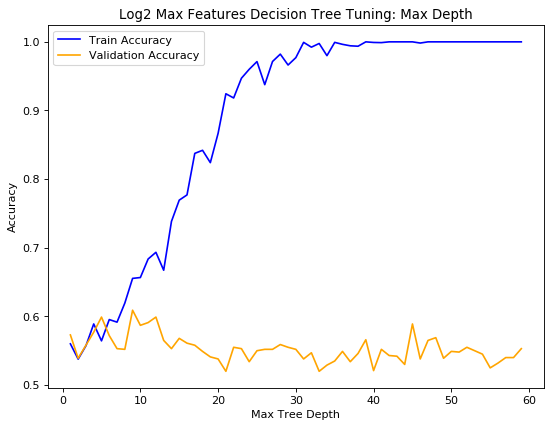

In [334]:
xaxis_data = max_lens
yaxis_data_train = [i[1] for i in tree_log2_models]
yaxis_data_val = [i[2] for i in tree_log2_models]

figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')

plt.plot(xaxis_data, yaxis_data_train, color='blue', label='Train Accuracy')
plt.plot(xaxis_data, yaxis_data_val, color='orange', label="Validation Accuracy")

# Plot text
plt.legend()
plt.title('Log2 Max Features Decision Tree Tuning: Max Depth')
plt.xlabel('Max Tree Depth')
plt.ylabel('Accuracy')

plt.savefig('Log2-CV.png', dpi=420)
plt.show()

In [335]:
max([i[2] for i in tree_log2_models])

0.609

In [336]:
tree_log2_models

[(DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=1,
              max_features='log2', max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, presort=False, random_state=None,
              splitter='best'), 0.56, 0.573, 0.5642926829268292),
 (DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
              max_features='log2', max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, presort=False, random_state=None,
              splitter='best'), 0.53775, 0.539, 0.5333658536585366),
 (DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
              max_features='log2', max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
        

In [337]:
feature_importance = list(tree_log2_models[6][0].feature_importances_)
arr = []
for i,j in zip(train.drop('HasDetections', axis=1).columns, feat_importance):
    if j > 0:
        arr.append((i,j))
arr

[('AppVersion', 0.005411327669183273),
 ('AvSigVersion', 0.12818671910397597),
 ('AVProductStatesIdentifier', 0.019625544389855067),
 ('AVProductsInstalled', 0.16069486380517994),
 ('HasTpm', 0.005490099761724008),
 ('CityIdentifier', 0.01065026768708279),
 ('OrganizationIdentifier', 0.002785002849290186),
 ('GeoNameIdentifier', 0.006808097717126339),
 ('OsBuildLab', 0.007049092326582092),
 ('SmartScreen', 0.5085008289759555),
 ('Census_OEMNameIdentifier', 0.021666999426615246),
 ('Census_ProcessorModelIdentifier', 0.015092964290409032),
 ('Census_PrimaryDiskTotalCapacity', 0.007871022064266582),
 ('Census_ChassisTypeName', 0.007338133670530459),
 ('Census_InternalPrimaryDiagonalDisplaySizeInInches', 0.0722616906808893),
 ('Census_OSArchitecture', 0.004870194902264946),
 ('Census_OSBuildRevision', 0.0043459161036154895),
 ('Census_FirmwareVersionIdentifier', 0.0057440470328050195),
 ('Census_IsSecureBootEnabled', 0.0056071875426488005)]

In [338]:
tree_log2_models[4]

(DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
             max_features='log2', max_leaf_nodes=None,
             min_impurity_decrease=0.0, min_impurity_split=None,
             min_samples_leaf=1, min_samples_split=2,
             min_weight_fraction_leaf=0.0, presort=False, random_state=None,
             splitter='best'), 0.564375, 0.599, 0.5500731707317074)

In [318]:
feat_importance = tree_log2_models[4][0].feature_importances_

In [319]:
arr = []
for i,j in zip(train.drop('HasDetections', axis=1).columns, feat_importance):
    arr.append((i,j))
arr

[('ProductName', 0.0),
 ('EngineVersion', 0.0),
 ('AppVersion', 0.005411327669183273),
 ('AvSigVersion', 0.12818671910397597),
 ('RtpStateBitfield', 0.0),
 ('IsSxsPassiveMode', 0.0),
 ('DefaultBrowsersIdentifier', 0.0),
 ('AVProductStatesIdentifier', 0.019625544389855067),
 ('AVProductsInstalled', 0.16069486380517994),
 ('AVProductsEnabled', 0.0),
 ('HasTpm', 0.005490099761724008),
 ('CountryIdentifier', 0.0),
 ('CityIdentifier', 0.01065026768708279),
 ('OrganizationIdentifier', 0.002785002849290186),
 ('GeoNameIdentifier', 0.006808097717126339),
 ('LocaleEnglishNameIdentifier', 0.0),
 ('Processor', 0.0),
 ('OsVer', 0.0),
 ('OsBuild', 0.0),
 ('OsSuite', 0.0),
 ('OsPlatformSubRelease', 0.0),
 ('OsBuildLab', 0.007049092326582092),
 ('SkuEdition', 0.0),
 ('IsProtected', 0.0),
 ('IeVerIdentifier', 0.0),
 ('SmartScreen', 0.5085008289759555),
 ('Firewall', 0.0),
 ('Census_MDC2FormFactor', 0.0),
 ('Census_OEMNameIdentifier', 0.021666999426615246),
 ('Census_OEMModelIdentifier', 0.0),
 ('Censu

In [339]:
tree_sqrt_models = []

for i, m_len  in enumerate(max_lens):
    tree_sqrt_clf = DecisionTreeClassifier(max_depth=m_len, max_features='sqrt')
    tree_sqrt_clf.fit(X, y)

    # Prediction acc
    train_acc = np.sum([tree_sqrt_clf.predict(X) == y], axis=1) / len(y)
    val_acc = np.sum([tree_sqrt_clf.predict(X_val) == y_val], axis=1) / len(y_val)
    test_acc = np.sum([tree_sqrt_clf.predict(X_test) == y_test], axis=1) / len(y_val)

    # Save model and acc
    tree_sqrt_models.append((tree_sqrt_clf, train_acc[0], val_acc[0], ))

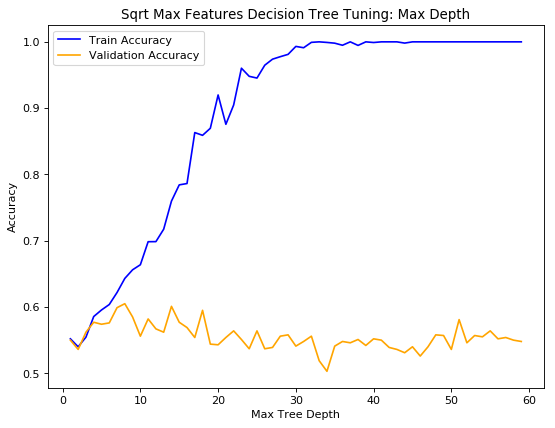

In [340]:
xaxis_data = max_lens
yaxis_sqrt_train = [i[1] for i in tree_sqrt_models]
yaxis_sqrt_val = [i[2] for i in tree_sqrt_models]

figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')

# Plot Data
plt.plot(xaxis_data, yaxis_sqrt_train, color='blue', label="Train Accuracy")
plt.plot(xaxis_data, yaxis_sqrt_val, color='orange', label="Validation Accuracy")

# Plot text
plt.legend()
plt.title('Sqrt Max Features Decision Tree Tuning: Max Depth')
plt.xlabel('Max Tree Depth')
plt.ylabel('Accuracy')

plt.savefig('Sqrt-CV.png', dpi=420)

plt.show()

In [341]:
max([i[2] for i in tree_sqrt_models])

0.605

In [342]:
tree_sqrt_models

[(DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=1,
              max_features='sqrt', max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, presort=False, random_state=None,
              splitter='best'), 0.552, 0.55),
 (DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
              max_features='sqrt', max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, presort=False, random_state=None,
              splitter='best'), 0.54, 0.536),
 (DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
              max_features='sqrt', max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split

In [348]:
feat_importance = tree_sqrt_models[7][0].feature_importances_

In [349]:
arr = []
for i,j in zip(train.drop('HasDetections', axis=1).columns, feat_importance):
    if j > 0:
        arr.append((i,j))
arr

[('EngineVersion', 0.09797331267045815),
 ('AppVersion', 0.019741279003257204),
 ('AvSigVersion', 0.019891061703133407),
 ('DefaultBrowsersIdentifier', 0.006459270871591631),
 ('AVProductStatesIdentifier', 0.011409068068357932),
 ('AVProductsInstalled', 0.11096245124235501),
 ('CountryIdentifier', 0.005484038520492168),
 ('CityIdentifier', 0.03340663155847973),
 ('OrganizationIdentifier', 0.0019450357932891949),
 ('GeoNameIdentifier', 0.04800244363364314),
 ('LocaleEnglishNameIdentifier', 0.0026040478507890078),
 ('OsPlatformSubRelease', 0.014639508082357158),
 ('OsBuildLab', 0.016157268405932613),
 ('SkuEdition', 0.0029373228699584317),
 ('IeVerIdentifier', 0.02244268049646621),
 ('SmartScreen', 0.12120814002527844),
 ('Census_MDC2FormFactor', 0.00527028748848066),
 ('Census_OEMNameIdentifier', 0.02096356194315714),
 ('Census_OEMModelIdentifier', 0.02235835173129051),
 ('Census_ProcessorCoreCount', 0.005456866808907994),
 ('Census_ProcessorModelIdentifier', 0.04760404814757409),
 ('Ce

In [354]:
arr.sort(key = lambda arr: arr[1]) 

In [355]:
arr

[('Census_PowerPlatformRoleName', 0.001103013920531091),
 ('OrganizationIdentifier', 0.0019450357932891949),
 ('LocaleEnglishNameIdentifier', 0.0026040478507890078),
 ('SkuEdition', 0.0029373228699584317),
 ('Census_ActivationChannel', 0.0030759429592152414),
 ('Census_FlightRing', 0.0030789141592119512),
 ('Census_OSBuildNumber', 0.003268189394166195),
 ('Census_HasOpticalDiskDrive', 0.004126664992184298),
 ('Census_InternalPrimaryDiagonalDisplaySizeInInches', 0.0044002119285425625),
 ('Census_ChassisTypeName', 0.0051817671596256),
 ('Census_MDC2FormFactor', 0.00527028748848066),
 ('Census_ProcessorCoreCount', 0.005456866808907994),
 ('CountryIdentifier', 0.005484038520492168),
 ('Census_OSWUAutoUpdateOptionsName', 0.005845636681005605),
 ('DefaultBrowsersIdentifier', 0.006459270871591631),
 ('Census_InternalBatteryNumberOfCharges', 0.007947131097114965),
 ('Census_OSInstallLanguageIdentifier', 0.007971386436886583),
 ('Census_IsSecureBootEnabled', 0.009152645071616523),
 ('Census_OSU

In [350]:
sum(i[1] for i in arr)

0.9999999999999999

In [ ]:
[('AppVersion', 0.005411327669183273),
 ('AvSigVersion', 0.12818671910397597),
 ('AVProductStatesIdentifier', 0.019625544389855067),
 ('AVProductsInstalled', 0.16069486380517994),
 ('HasTpm', 0.005490099761724008),
 ('CityIdentifier', 0.01065026768708279),
 ('OrganizationIdentifier', 0.002785002849290186),
 ('GeoNameIdentifier', 0.006808097717126339),
 ('OsBuildLab', 0.007049092326582092),
 ('SmartScreen', 0.5085008289759555),
 ('Census_OEMNameIdentifier', 0.021666999426615246),
 ('Census_ProcessorModelIdentifier', 0.015092964290409032),
 ('Census_PrimaryDiskTotalCapacity', 0.007871022064266582),
 ('Census_ChassisTypeName', 0.007338133670530459),
 ('Census_InternalPrimaryDiagonalDisplaySizeInInches', 0.0722616906808893),
 ('Census_OSArchitecture', 0.004870194902264946),
 ('Census_OSBuildRevision', 0.0043459161036154895),
 ('Census_FirmwareVersionIdentifier', 0.0057440470328050195),
 ('Census_IsSecureBootEnabled', 0.0056071875426488005)]


In [217]:
tree_sqrt_models[8]

(DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=9,
             max_features='sqrt', max_leaf_nodes=None,
             min_impurity_decrease=0.0, min_impurity_split=None,
             min_samples_leaf=1, min_samples_split=2,
             min_weight_fraction_leaf=0.0, presort=False, random_state=None,
             splitter='best'), 0.65575, 0.584)

In [218]:
tree_sqrt_models[6]

(DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=7,
             max_features='sqrt', max_leaf_nodes=None,
             min_impurity_decrease=0.0, min_impurity_split=None,
             min_samples_leaf=1, min_samples_split=2,
             min_weight_fraction_leaf=0.0, presort=False, random_state=None,
             splitter='best'), 0.632625, 0.5795)

### 3.2 Logistic Regression

In [265]:
from sklearn.linear_model import LogisticRegression

In [266]:
ones = np.ones(X.shape[0]).reshape(-1, 1)
logit_X = np.append(X, ones, 1)

ones = np.ones(X_val.shape[0]).reshape(-1, 1)
logit_X_val = np.append(X_val, ones, 1)

In [267]:
lr = LogisticRegression(penalty='l2', solver='liblinear')
lr.fit(X, y)
print("Train Acc %.4f" % (np.sum([lr.predict(X) == y], axis=1) / len(y)))
print("Test  Acc %.4f" % (np.sum([lr.predict(X_val) == y_val], axis=1) / len(y_val)))

Train Acc 0.5270
Test  Acc 0.5360


#### 3.2.1 L2 Regularized Logistic Regression

In [268]:
for i, c  in enumerate(C):
    print(i,c)

0 0.0001
1 0.001
2 0.005
3 0.01
4 1
5 10
6 100
7 500
8 1000
9 5000
10 10000


In [277]:
# Logistic regression with L2 regularization
C = [.0001, .00025, .0005, .00075, .001, .0025, .005, .0075, .01, 1, 10, 100, 500, 1000, 10000]
#C = [.000001, .01, 1, 10, 100, 1000000]

l2_logit_models = []

for i, c  in enumerate(C):
    lr = LogisticRegression(penalty='l2', C=c, solver='liblinear')
    lr.fit(X, y)

    # Prediction acc
    train_acc = np.sum([lr.predict(X) == y], axis=1) / len(y)
    val_acc = np.sum([lr.predict(X_val) == y_val], axis=1) / len(y_val)

    # Save model and acc
    l2_logit_models.append((lr, train_acc[0], val_acc[0], ))

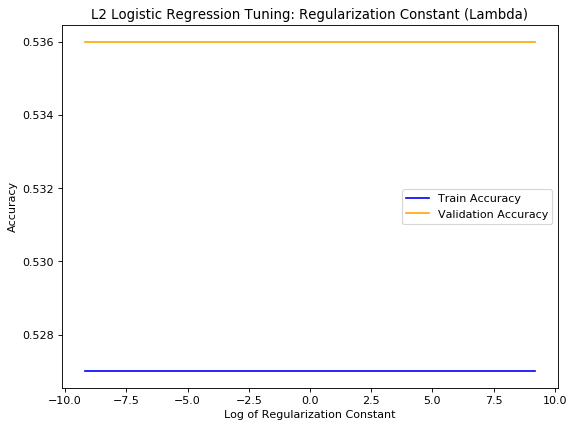

In [278]:
xaxis_data = C
yaxis_l2_logit_train = [i[1] for i in l2_logit_models]
yaxis_l2_logit_val = [i[2] for i in l2_logit_models]

figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')

# Plot Data
plt.plot(np.log(xaxis_data), yaxis_l2_logit_train, color='blue', label="Train Accuracy")
plt.plot(np.log(xaxis_data), yaxis_l2_logit_val, color='orange', label="Validation Accuracy")

# Plot text
plt.legend()
plt.title('L2 Logistic Regression Tuning: Regularization Constant (Lambda)')
plt.xlabel('Log of Regularization Constant')
plt.ylabel('Accuracy')

plt.show()

In [275]:
C

[1e-06, 0.01, 1, 10, 100, 1000000]

#### 3.2.1 L1 Regularized Logistic Regression

In [242]:
# Logistic regression with L1 regularization
C = [.0001, .001, .005, .01, 1, 10, 100, 500, 1000, 5000, 10000]

l1_logit_models = []

for i, c  in enumerate(C):
    lr = LogisticRegression(penalty='l1', C=c, solver='liblinear')
    lr.fit(logit_X, y)

    # Prediction acc
    train_acc = np.sum([lr.predict(logit_X) == y], axis=1) / len(y)
    val_acc = np.sum([lr.predict(logit_X_val) == y_val], axis=1) / len(y_val)

    # Save model and acc
    l1_logit_models.append((lr, train_acc[0], val_acc[0], ))

/anaconda3/envs/py3-env/lib/python3.7/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/anaconda3/envs/py3-env/lib/python3.7/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/anaconda3/envs/py3-env/lib/python3.7/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/anaconda3/envs/py3-env/lib/python3.7/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/anaconda3/envs/py3-env/lib/python3.7/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number o

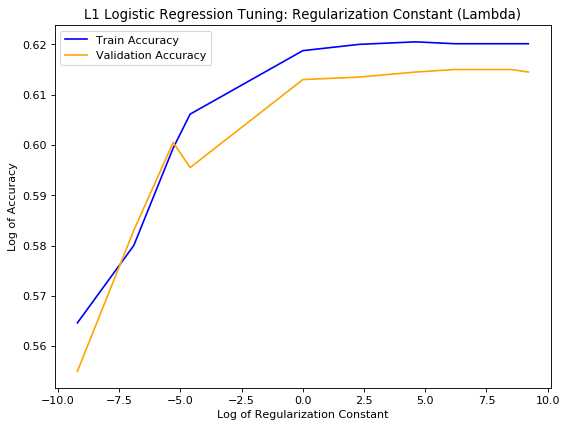

In [246]:
xaxis_data = C
yaxis_l1_logit_train = [i[1] for i in l1_logit_models]
yaxis_l1_logit_val = [i[2] for i in l1_logit_models]

figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')

# Plot Data
plt.plot(np.log(xaxis_data), yaxis_l1_logit_train, color='blue', label="Train Accuracy")
plt.plot(np.log(xaxis_data), yaxis_l1_logit_val, color='orange', label="Validation Accuracy")

# Plot text
plt.legend()
plt.title('L1 Logistic Regression Tuning: Regularization Constant (Lambda)')
plt.xlabel('Log of Regularization Constant')
plt.ylabel('Log of Accuracy')

plt.savefig('L1-Logistic-CV.png', dpi=420)

plt.show()

In [248]:
max(i[2] for i in l1_logit_models)

0.615

In [249]:
l1_logit_models

[(LogisticRegression(C=0.0001, class_weight=None, dual=False,
            fit_intercept=True, intercept_scaling=1, max_iter=100,
            multi_class='warn', n_jobs=None, penalty='l1', random_state=None,
            solver='liblinear', tol=0.0001, verbose=0, warm_start=False),
  0.564625,
  0.555),
 (LogisticRegression(C=0.001, class_weight=None, dual=False, fit_intercept=True,
            intercept_scaling=1, max_iter=100, multi_class='warn',
            n_jobs=None, penalty='l1', random_state=None, solver='liblinear',
            tol=0.0001, verbose=0, warm_start=False), 0.58, 0.583),
 (LogisticRegression(C=0.005, class_weight=None, dual=False, fit_intercept=True,
            intercept_scaling=1, max_iter=100, multi_class='warn',
            n_jobs=None, penalty='l1', random_state=None, solver='liblinear',
            tol=0.0001, verbose=0, warm_start=False), 0.599375, 0.6005),
 (LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
            intercept_sc

In [245]:
lr.coef_

array([[ 2.07303755e-02, -1.67369694e-02, -4.75030517e-06,
         1.34071174e-01,  9.24543856e-01, -1.17283276e-04,
         1.25270217e-05, -3.73299198e-01, -4.12536719e-02,
        -1.12407945e-01, -1.01844009e-05, -1.07386681e-06,
         3.25142472e-03,  2.50192511e-04,  6.77801714e-04,
        -4.27973916e-01, -2.59649967e-01, -1.67193104e-04,
         6.36840642e-04,  1.90028855e-02,  3.93704222e-03,
        -6.52900240e-02,  7.55056988e-01, -1.13340979e-03,
        -3.55804477e-01,  6.40164038e-02, -1.72748133e-02,
        -6.60740940e-06,  9.02197758e-07,  2.15952515e-02,
        -6.86974590e-04, -3.60060366e-05,  4.30624027e-07,
         3.91146735e-03, -3.19348600e-07,  7.75166812e-02,
         1.28025299e-05, -1.72649144e-02,  6.85152009e-04,
         7.65999731e-05, -2.32659264e-04,  3.95148641e-02,
        -5.89359759e-02, -3.90924937e-11, -6.83265308e-03,
         1.77440627e-02,  4.73746292e-02,  2.39885697e-04,
        -2.13440920e-05,  6.25937763e-02, -1.44939411e-0

In [ ]:
print ("C = 100 is the best")

In [ ]:
c = 100000
lr = LogisticRegression(penalty='l1', C=c, solver='liblinear')
lr.fit(logit_X, y)

# Prediction acc
train_acc = np.sum([lr.predict(logit_X) == y], axis=1) / len(y)
val_acc = np.sum([lr.predict(logit_X_val) == y_val], axis=1) / len(y_val)

# Save model and acc
l1_logit_models.append((lr, train_acc[0], val_acc[0], ))